import libraries


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read csv file

In [52]:
dataset = pd.read_csv("/content/User_Data.csv")

taking particular columns

In [53]:
# input
x = dataset.iloc[:, [2, 3]].values

# output
y = dataset.iloc[:, 4].values

split the data set

In [54]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
	x, y, test_size=0.25, random_state=0)


In [55]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [56]:
from sklearn.tree import DecisionTreeClassifier
predictor=DecisionTreeClassifier(criterion="entropy",random_state=0)
predictor.fit(xtrain,ytrain)


DecisionTreeClassifier(criterion='entropy', random_state=0)

predicting on testing data

In [57]:
y_pred=predictor.predict(xtest)

In [58]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [59]:
xtest=[0,1,1,1,0]
y_pred=[0,1,1,0,1]
from sklearn.metrics import confusion_matrix
pr=confusion_matrix(xtest,y_pred)



confucion matrix

In [60]:
from sklearn.metrics import accuracy_score

# Assuming you have trained a classification model and made predictions
y_true = [0, 1, 1, 0, 1]  # True class labels
y_pred = [0, 1, 0, 1, 1]  # Predicted class labels

# Calculate classification metrics
accuracy = accuracy_score(y_true, y_pred)


print("Accuracy:", accuracy)



Accuracy: 0.6


visulaization

In [61]:
from sklearn.datasets import make_classification


In [62]:
X,y=make_classification(n_samples=100,n_features=2,n_classes=2,n_informative=2,n_redundant=0,random_state=42)

In [63]:

predictor.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [64]:
xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),(y_min,y_max,100))
z=predictor.predict(np.c_[xx.ravel(),yy.ravel()])

In [65]:
z=z.reshape(xx.shape)
z=z.reshape(yy.shape)

In [66]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

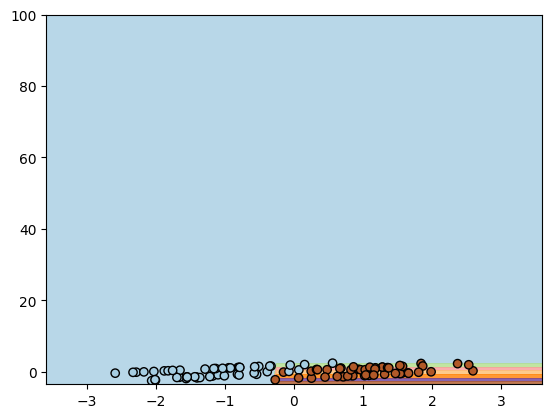

In [67]:
plt.contourf(xx,yy,z,alpha=0.8,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,edgecolor="k",cmap=plt.cm.Paired)